# 1. Introduction: Data Analytics in Insurance
Emerging technologies like AI, Machine Learning, Block Chain, Cloud Computing and Big Data Analytics have brought a radical change in today's global financial landscape. As traditional business models adapt and evolve to harness the promise of these technologies, and the barriers between various 'specialized' domains across industries slowly dissolve, more and more industries are adopting a Digital Transformation Strategy. Insurance is no exception.

The Insurance sector is no stranger to data driven decision making. Yet AI and Big Data are revolutionizing the industry. The following image briefly illustrates the digital transformation in Insurance today, and the role played by Analytics:

<img src="https://raw.githubusercontent.com/AnirbanDatta87/Projects/master/P1_EDA/img/1_ins.jpg" width="900">

In this project, we attempt to analyze and explore a dataset for medical costs in Health Insurance in USA in order to derive valuable insights, and find answers to questions through statistical hypothesis testing.

### 1.1. Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### 1.2. Domain: Health Insurance

### 1.3. Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

### 1.4. Attribute Information:

 - <b>age:</b> Age of primary beneficiary
 - <b>sex:</b> Insurance contractor gender, female / male
 - <b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / $m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
 - <b>children:</b> Number of children covered by health insurance / Number of dependents
 - <b>smoker:</b> Smoker / Non - smoker
 - <b>region:</b> The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
 - <b>charges:</b> Individual medical costs billed by health insurance.

### 1.5 Objectives:
     1. Exploratory Data Analysis and Data Visualization
     2. Hypothesis Testing
     
### 1.6 Importing the Libraries:

In [27]:
# Lodaing the necessary Libraries.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 2. Loading the Data:

In [28]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Exploratory Data Analysis:
## 3.1 Shape:
Lets's start with the shape of the data.

In [29]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')

Shape of the data: (1338, 7)
There are 1338 rows in the data.


## 3.2 Data Types:
Let's understand the data types of various attributes.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
# What are the different datatypes present in the data?
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [32]:
# Let's check out individual columns:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
# Transform the Index object to a series, and grouping by data types:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [34]:
# let's create a dictionary containing various datatypes (Integer, Float and object) and the columns that have this datatype:
dt = {k.name: v for k, v in g.items()}
# Display the columns by different datatypes:
attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

,Attr 1,Attr 2,Attr 3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


We observe that 'age'(int64), 'bmi'(float64) and 'charges'(float64) are numerical attributes; and 'sex', 'smoker', 'region' and 'children' are categorical attributes.

We observe that the 'children' column is being treated as an integer datatype, even though it contains categorical information.

In [35]:
# Unique values for 'children':
sorted(data['children'].unique())

[0, 1, 2, 3, 4, 5]

## 3.3. Data Cleaning:
Let's check if the DataFrame contains any missing or null values.

In [36]:
data.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


There are no missing data in the DataFrame.
## 3.4. Summary and Distribution of numerical attributes:
We can get an overview of the important statistics of the data through the <code>describe()</code> method:

In [37]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Now let's study the 5-point summary and distribution of the numerical attributes: Age, BMI and Charges.
 - The Density plot gives an intuitive understanding of the underlying distribution of the attribute.
 - The Boxplot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels (quantiles) of variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
 - Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
 - The cumulative frequency also corresponds to the density distribution, and indicates the central tendency of the data.

In [38]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')

    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

In [39]:
# Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:

def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y):
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x,
                             grid=True,
                             figsize=(4, 8),
                             ax=axes,
                             vert = True,
                             notch=False,
                             widths = 0.7,
                             showmeans = True,
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()

    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

### 3.4.1. Age Distribution:

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


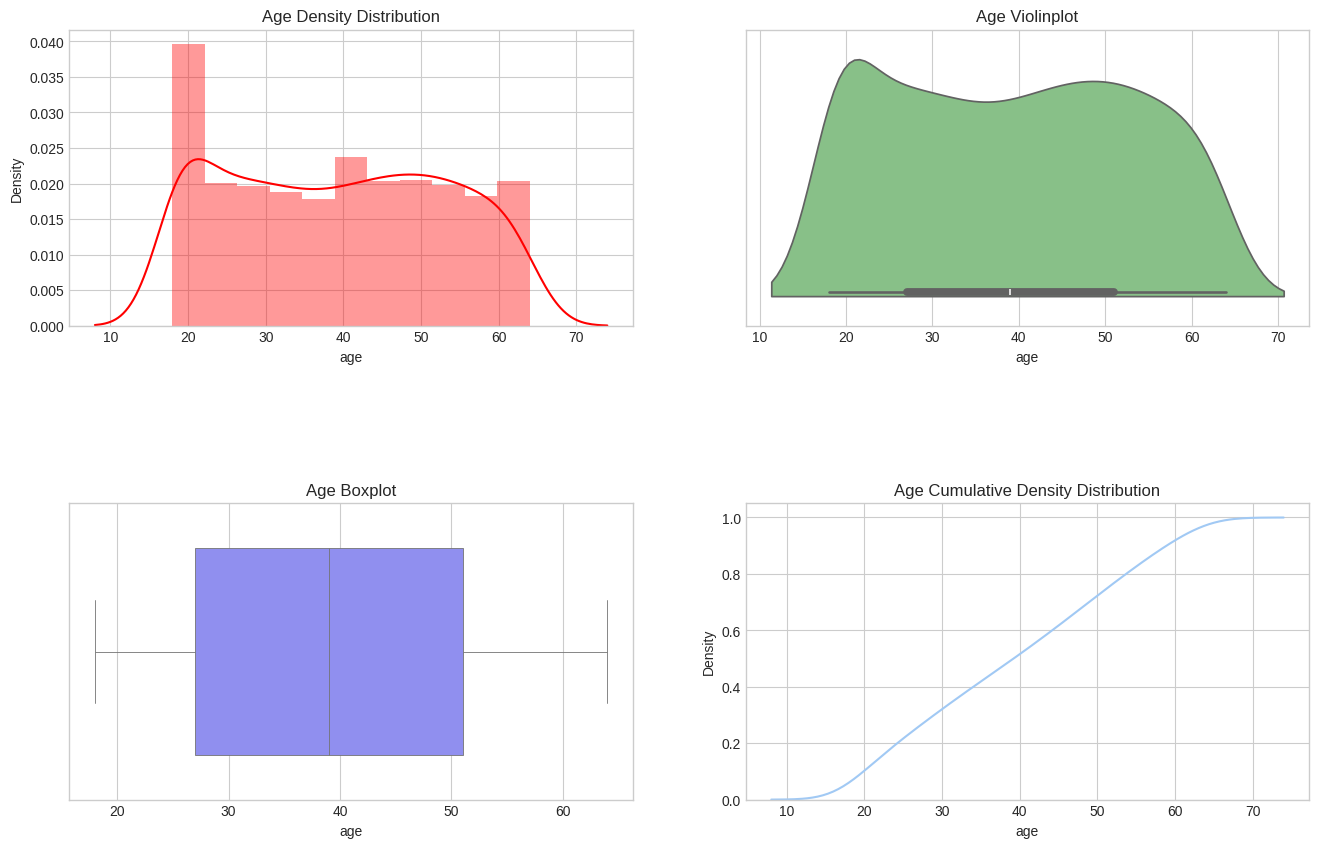

In [40]:
summary('age')

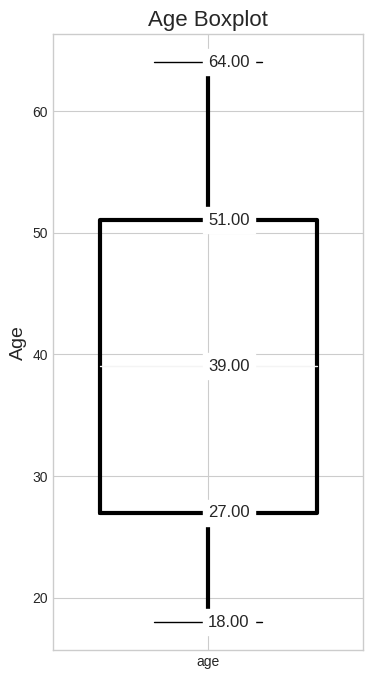

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [41]:
box_plot('age')

### Observations:
 - The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age being 18 and highest being 64.
 - There are no outlier values in the Age distribution in the data.

In [42]:
# How many of the insured have the age of 64?
df = data[data['age'] == data['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


### 3.4.2. BMI Distribution:

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


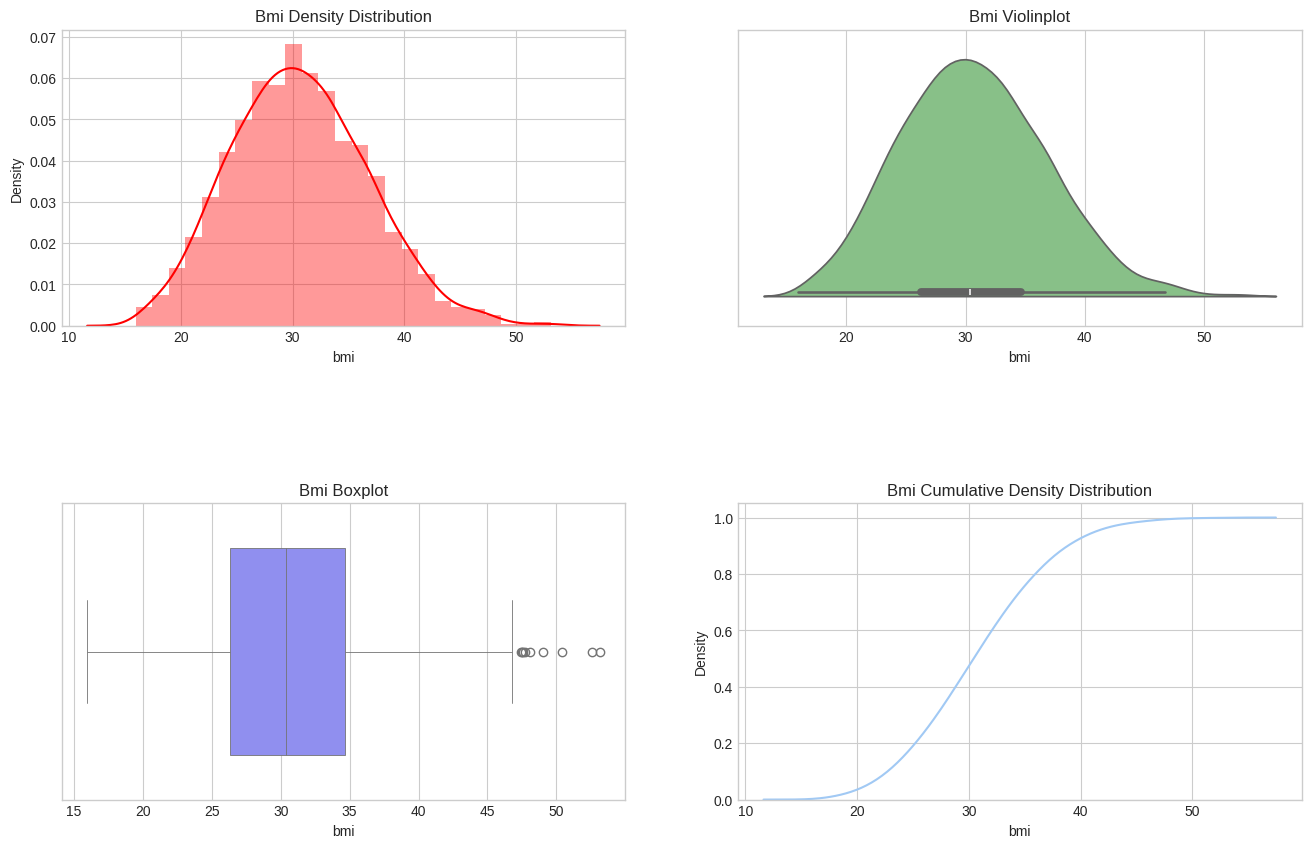

In [43]:
summary('bmi')

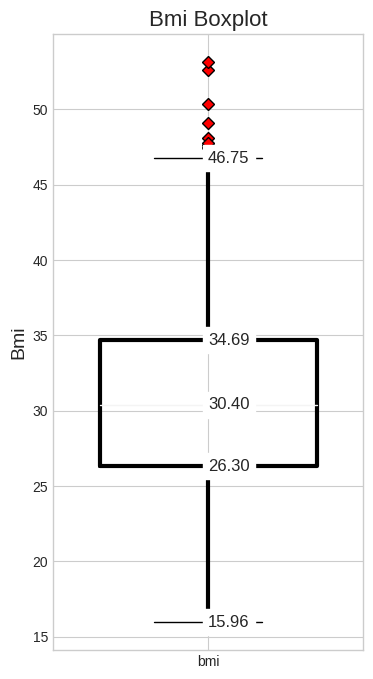

Mean Bmi = 30.66339686098655
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [44]:
box_plot('bmi')

In [45]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [46]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

### Observations:
 - The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
 - There are a total of 9 outlier values in the BMI distribution, all in the higher side. The highest BMI observed is 53.13.
 - The person with the highest BMI (least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium than the mean, but significantly more than the median charges. This is in line with our basic understanding of underwriting rules.

### 3.4.3. Charges Distribution:

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


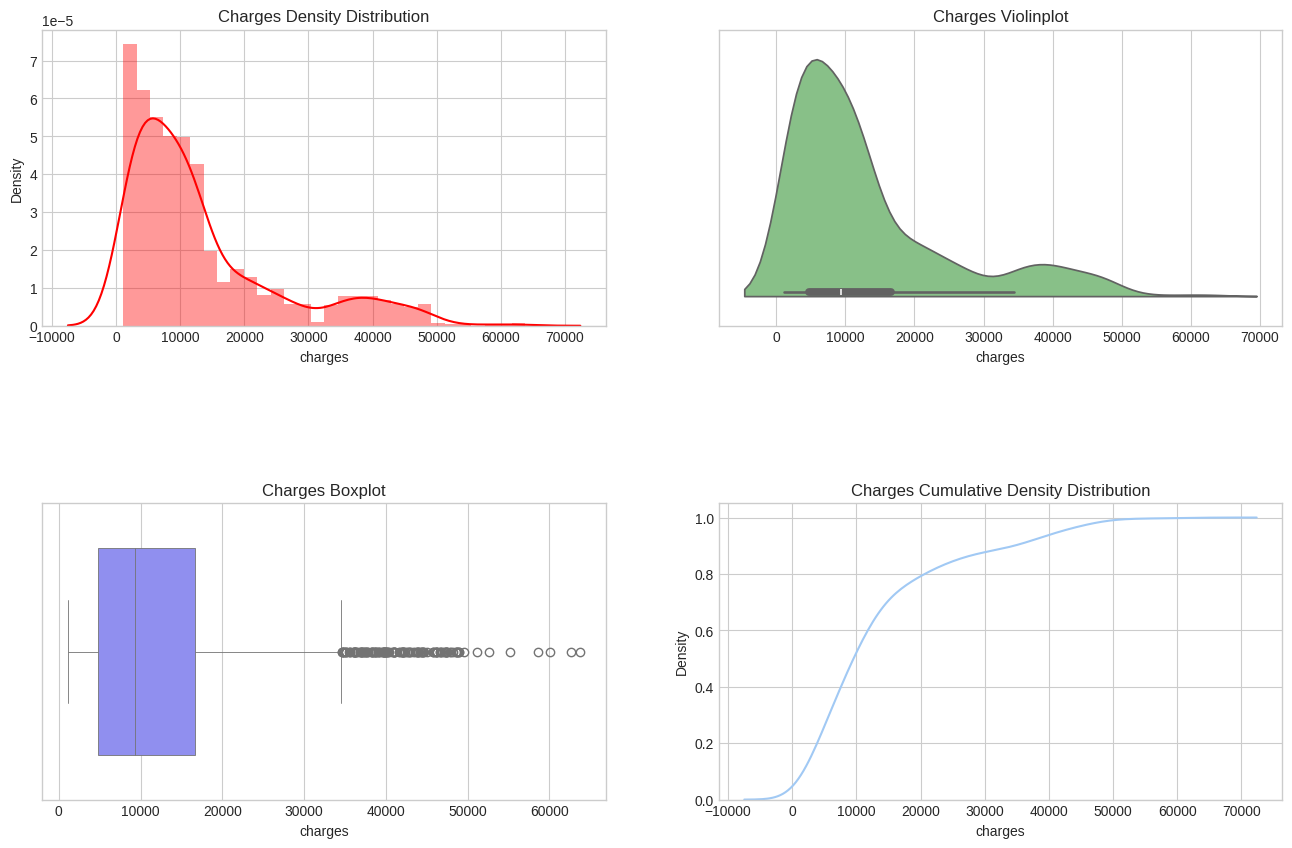

In [47]:
summary('charges')

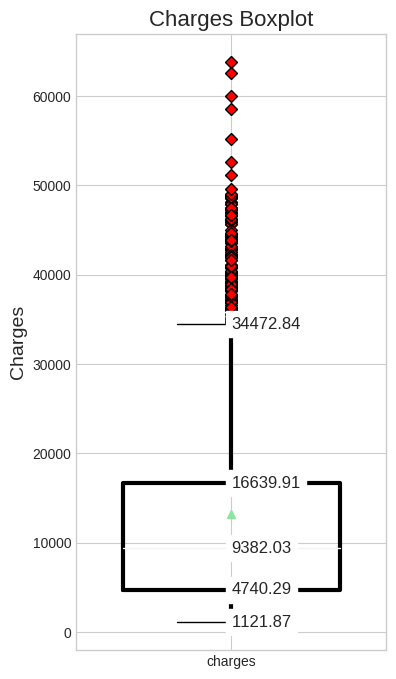

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [48]:
box_plot('charges')

In [49]:
# Who is paying the highest charges?
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [50]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [51]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

### Observations:
 - The Charges distribution of the Insured is heavily skewed to the left (median < mean) with a Mean of 13270.4223 and Median of 9382.033. The lowest charged amount is 1121.8739 and the highest charged amount is 63770.42801.  
 - Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side. The highest charges paid is 63770.42801.
 - The insured chared with highest premium is a 54 years old female smoker with relatively high BMI (indicating obesity).
 - The person with the highest BMI (obese, or least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium charges than the mean(which, we note, is affected by extreme outlier values of charges like the person above), but significantly more than the median. This is in line with our basic understanding of underwriting rules.

## 3.5. Summary and Distribution of categorical attributes:
Let's explore the distribution of categorical variables:  'sex', 'smoker', 'region' and 'children'.

In [52]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

### 3.5.1 Sex:

<Axes: xlabel='sex', ylabel='count'>

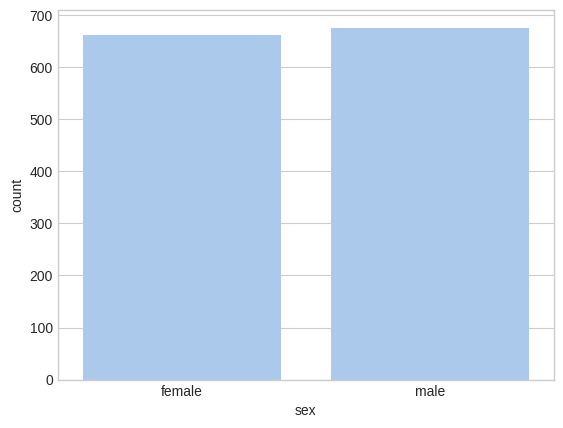

In [53]:
sns.countplot(x = 'sex', data = data)

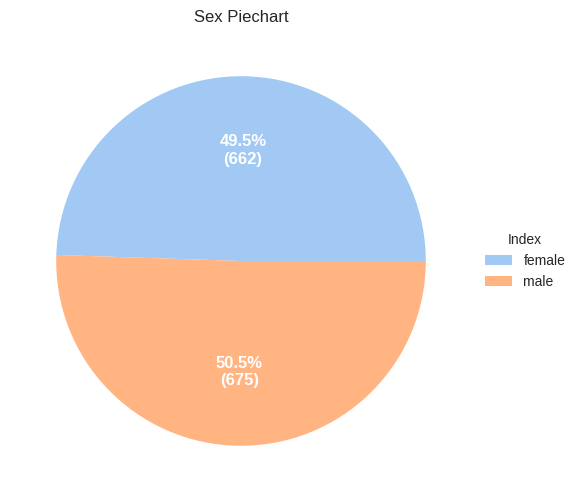

In [54]:
pie_chart('sex')

### Observation:
 - The dataset is almost evenly distributed among genders, with 676 Males (50.5%) and 662 Fenales (49.5%).

### 3.5.2. Smoker

<Axes: xlabel='smoker', ylabel='count'>

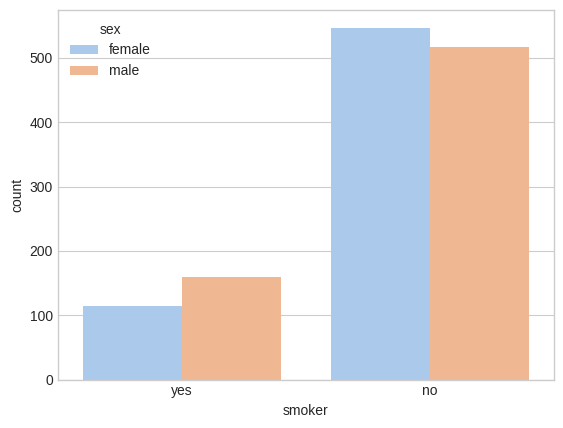

In [55]:
sns.countplot(x = 'smoker', hue = 'sex', data = data)

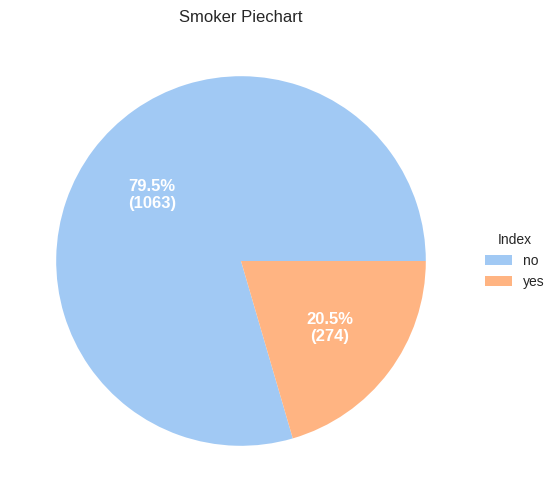

In [56]:
pie_chart('smoker')

In [57]:
# Are average premium charges for smokers significantly higher than non-smokers?
data['charges'].groupby(data['smoker']).mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [58]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<Axes: xlabel='smoker', ylabel='charges'>

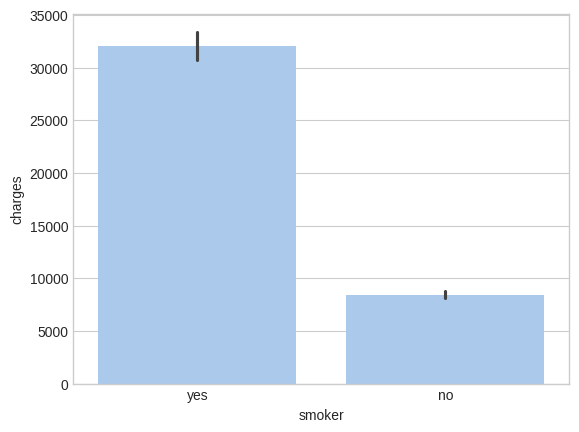

In [59]:
# yes, average premium charges for smokers are indeed significantly higher than non-smokers.
sns.barplot(x = "smoker", y = "charges", data = data)

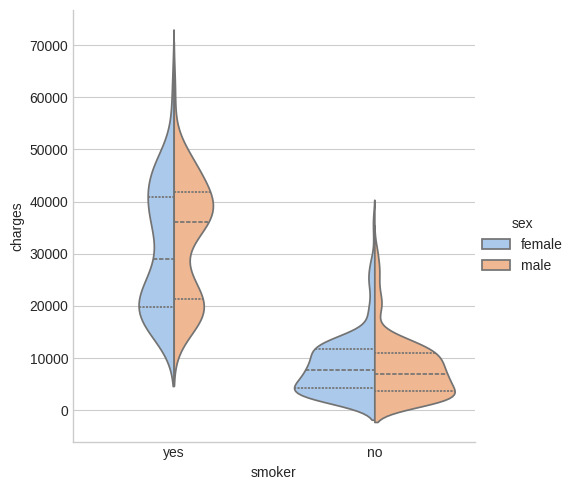

In [60]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data);

In [61]:
data.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

### Observations:
 - Of the total 1338 insured, 274 (20.5%) are smokers and the rest are non-smokers.
 - Among 274 smokers, proportion of males (159) are higher than females (115).
 - The average insurance premium for smokers are significantly higher than non-smokers.

### 3.5.3. Regions

<Axes: xlabel='region', ylabel='count'>

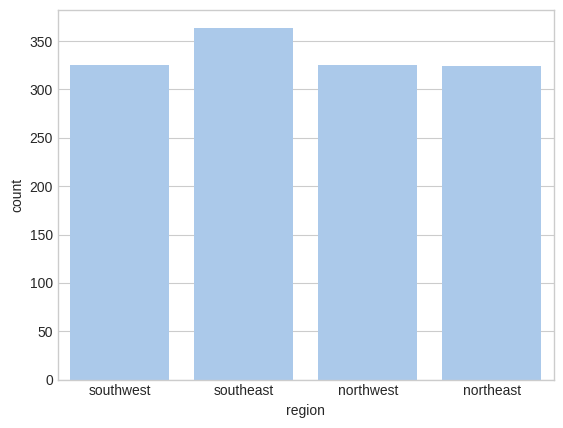

In [62]:
sns.countplot(x = 'region', data = data)

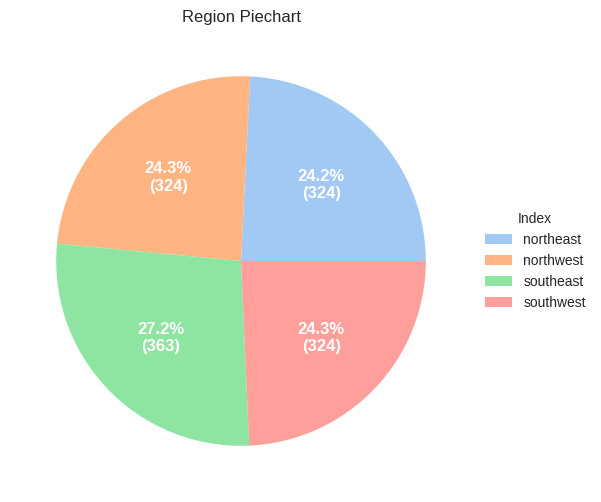

In [63]:
pie_chart('region')

### Observation:
 - All four regions are represented approximately evenly in the dataset.

### 3.5.4. Number of Children

<Axes: xlabel='children', ylabel='count'>

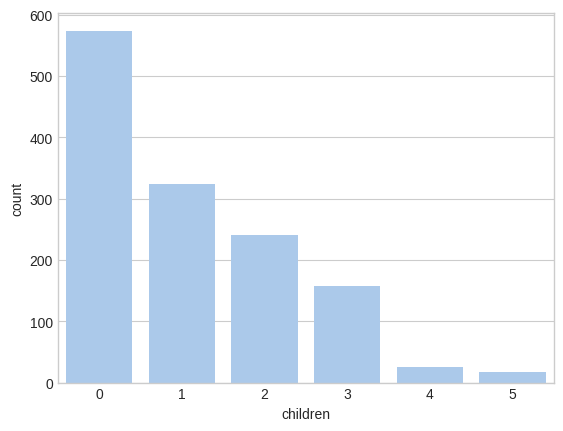

In [64]:
sns.countplot(x = 'children', data = data)

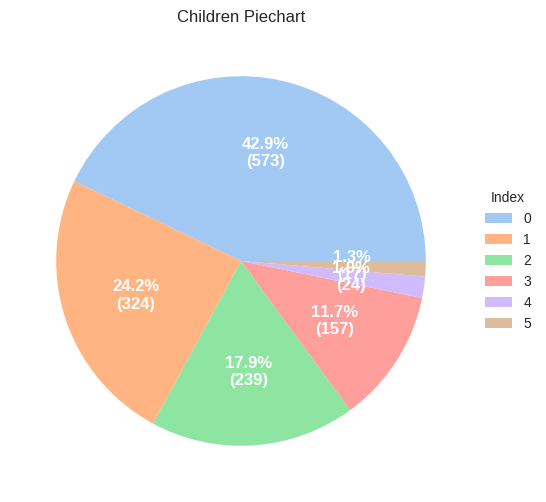

In [65]:
pie_chart('children')

In [66]:
data.groupby(['children']).agg('count')['age']

,age
children,
0,574
1,324
2,240
3,157
4,25
5,18


### Observation:
 - In the dataset, approximately 85% (1138 / 1338) of the insured have less than 3 children.

## 3.6. Pairplot:
Let's plot pairwise relationships in our dataset through a <code>pairplot</code>.
In order to show all columns in our pairplot, first let's convert all categorical attributes to their category codes.
First we set the datatypes of all the categorical variables as category:

In [67]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes

,0
age,int64
sex,category
bmi,float64
children,category
smoker,category
region,category
charges,float64


In [68]:
type(data.dtypes)

pandas.core.series.Series

In [69]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [70]:
# Finally, we transform the original columns by replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


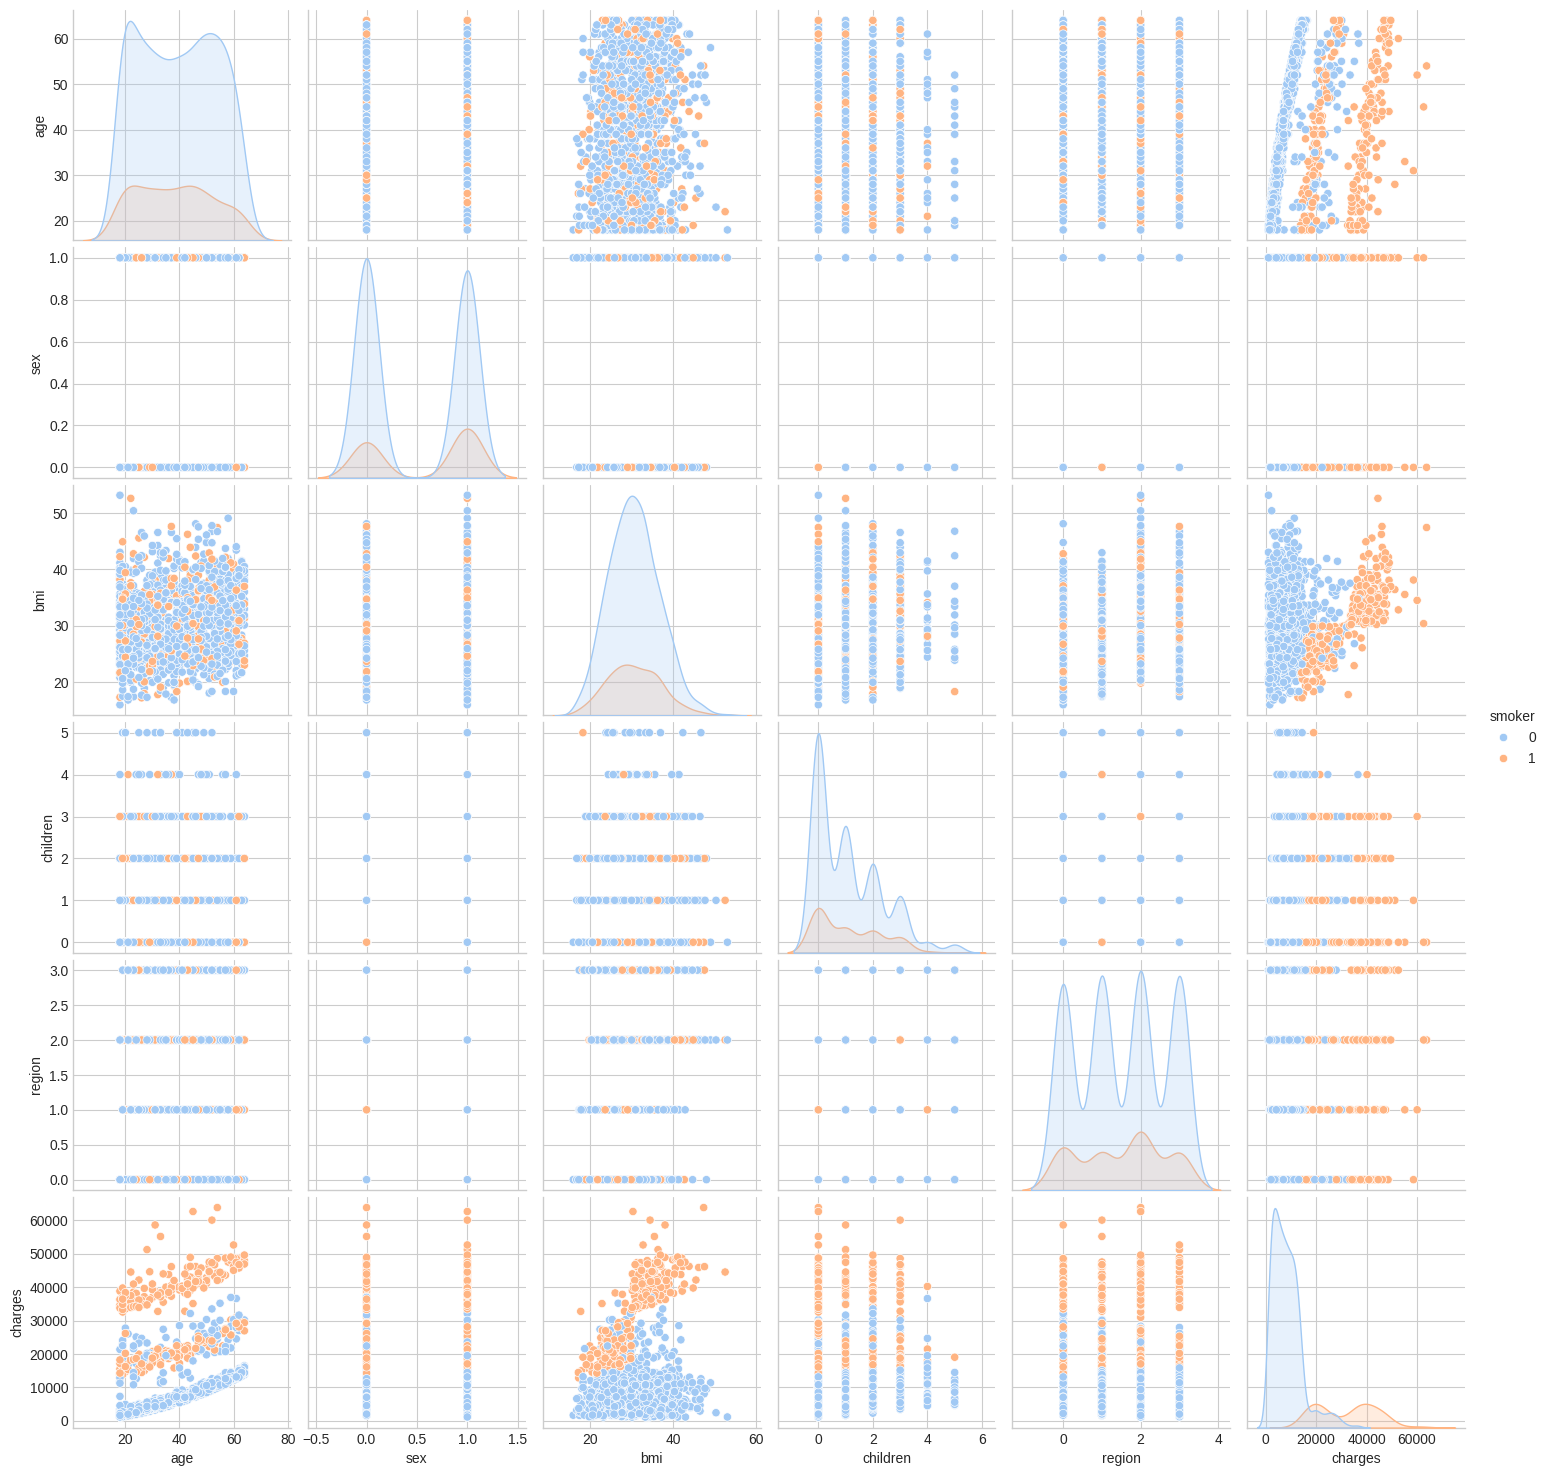

In [71]:
# Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(data, hue  = 'smoker')

A partcularly interesting relationship between Insurance Premium Charges, BMI and Smoking status (Smoker / Non - smoker) can be seen in this graph:

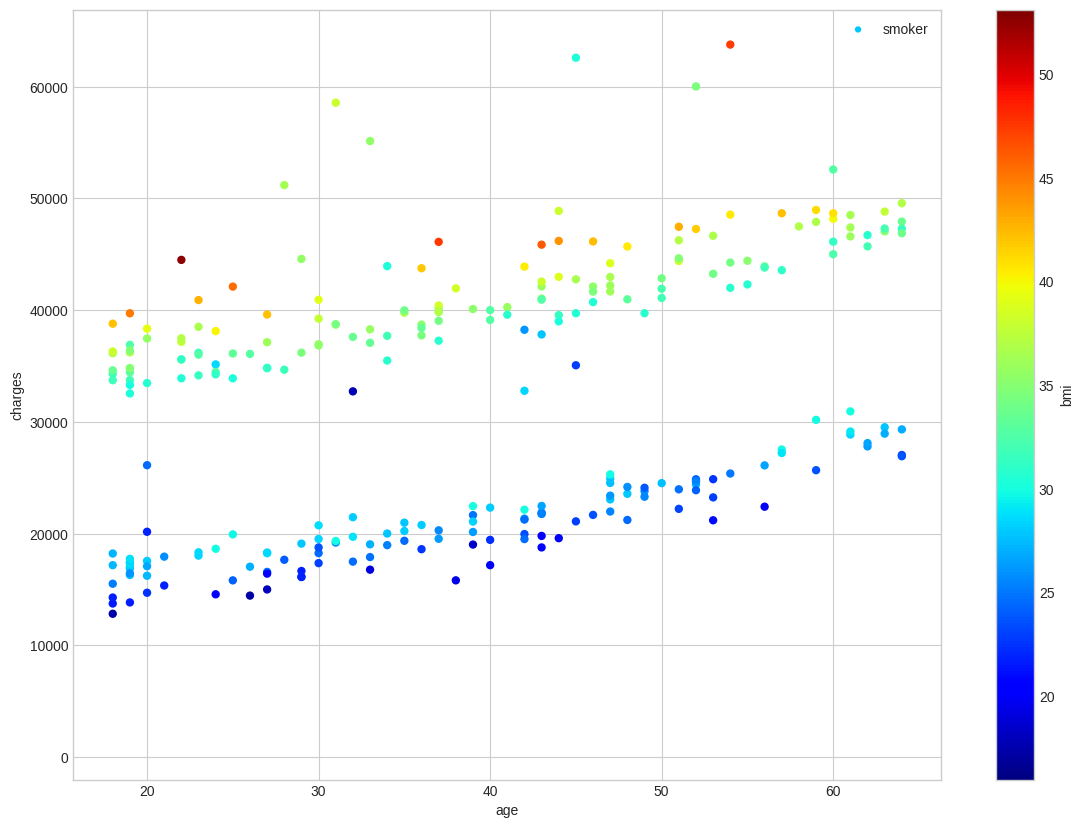

In [72]:
data.plot(kind="scatter", x="age", y="charges",
    s=data["smoker"]*25, label="smoker", figsize=(14,10),
    c='bmi', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

## 3.7. Correlation:
Let's study the correlation between different attributes in our dataset.

<Axes: >

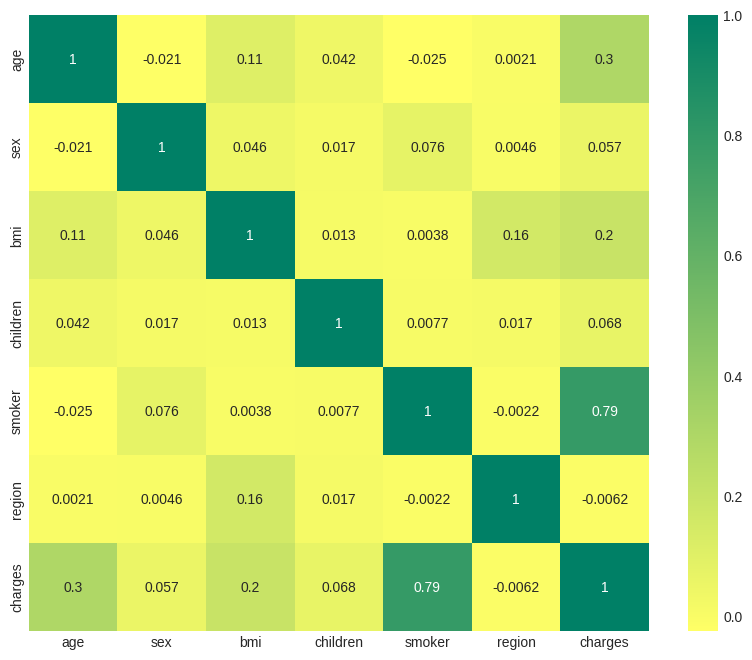

In [73]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

### Observation:
- From the correlation heatmap, we can conclude that the premium charges show a weak positive correlation with Age and BMI of the insured, and a strong positive correlation with smoking habit.

# 4. Hypothesis Testing:
A <b>Statistical Hypothesis Test</b> is a method of [statistical inference](https://en.wikipedia.org/wiki/Statistical_inference) which is used in making decisions using sample data.
Here we attempt to answer a few questions based on the nature of distribution and relationships between various attributes in our dataset through  Hypothesis Tests.
We follow the following methodology:

1. Formulate the null hypothesis  $H_0$ and the alternative hypothesis  $H_A$
2. Select an appropriate statistical test and the corresponding test statistic
3. Choose level of significance α (generally taken as 0.05)
4. Collect data and calculate the value of test statistic
5. Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic
6. Compare the probability associated with the test statistic with level of significance specified

## 4.1 Do charges of people who smoke differ significantly from the people who don't?

#### 4.1.1. Step 1: State the null and alternative hypothesis
* $H_0$: $\mu_s$ = $\mu_n$
* $H_A$: $\mu_s$ != $\mu_n$

Where:
 - $\mu_s$ = Mean Charge of all smokers in our data
 - $\mu_n$ = Mean Charge of all non - smokers in our data

#### 4.1.2. Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.
#### 4.1.3. Step 3: Choose level of significance α
We select α = 0.05
#### 4.1.4. Step 4: Collect data and calculate the value of test statistic:

In [74]:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 1064
Variance in charges of smokers: 35891656.00316426
Number of non - smokers: 274
Variance in charges of non - smokers: 132721153.13625307


In [75]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


#### 4.1.5. Step 5: Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [76]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 5.88946444671698e-103


#### 4.1.6. Step 6: Compare the probability associated with the test statistic with level of significance specified
At 5% significance level, α = 0.05

In [77]:
p_value > 0.05

False

### 4.1.7. Conclusion:
 - We <b>Reject</b> the Null Hypothesis and state that <b>At 5% significance level, the mean charges of smokers and non - smokers are not equal</b>.
 - Hence, charges of people who smoke indeed differ significantly from the people who don't.

## 4.1 Do charges of people who smoke differ significantly from the people who don't?

#### 4.1.1. Step 1: State the null and alternative hypothesis
* $H_0$: $\mu_s$ = $\mu_n$
* $H_A$: $\mu_s$ != $\mu_n$

Where:
 - $\mu_s$ = Mean Charge of all smokers in our data
 - $\mu_n$ = Mean Charge of all non - smokers in our data

#### 4.1.2. Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.
#### 4.1.3. Step 3: Choose level of significance α
We select α = 0.05
#### 4.1.4. Step 4: Collect data and calculate the value of test statistic

In [78]:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 1064
Variance in charges of smokers: 35891656.00316426
Number of non - smokers: 274
Variance in charges of non - smokers: 132721153.13625307


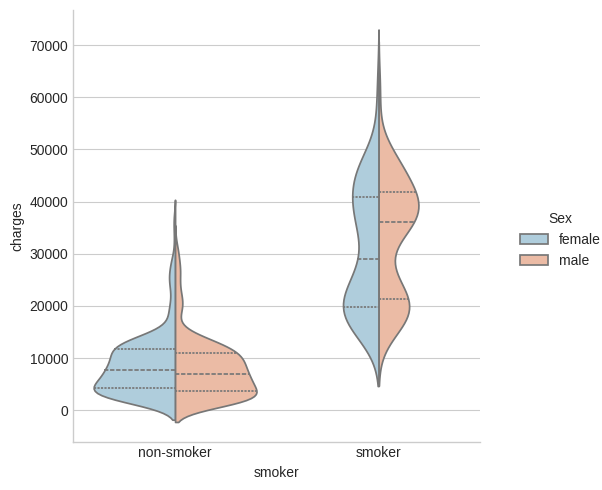

In [79]:
#Visualizing the collected data:
g = sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="RdBu_r", data=data, legend_out = True);

xlabels = ['non-smoker', 'smoker']
g.set_xticklabels(xlabels)

new_title = 'Sex'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['female', 'male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [80]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


#### 4.1.5. Step 5: Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [81]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 5.88946444671698e-103


#### 4.1.6. Step 6: Compare the probability associated with the test statistic with level of significance specified
At 5% significance level, α = 0.05

In [82]:
p_value > 0.05

False

### 4.1.7. Conclusion:
 - We <b>Reject</b> the Null Hypothesis and state that <b>At 5% significance level, the mean charges of smokers and non - smokers are not equal</b>.
 - Hence, charges of people who smoke indeed differ significantly from the people who don't.

## 4.2. Does BMI of males differ significantly from that of females?

#### 4.2.1. Step 1: State the null and alternative hypothesis
* $H_0$: $\mu_m$ = $\mu_f$
* $H_A$: $\mu_m$ != $\mu_f$

Where:
 - $\mu_m$ = Mean BMI of all male insured in our data
 - $\mu_f$ = Mean BMI of all female insured in our data

#### 4.2.2. Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.
#### 4.2.3. Step 3: Choose level of significance α
We select α = 0.05
#### 4.2.4. Step 4: Collect data and calculate the value of test statistic

In [83]:
males = data[data['sex'] == 1]
females = data[data['sex'] == 0]
bmi_males = males['bmi']
bmi_females = females['bmi']

print(f'Number of males: {males.shape[0]}')
print(f'Variance in BMI of males: {np.var(bmi_males)}')
print(f'Number of females: {females.shape[0]}')
print(f'Variance in BMI of females: {np.var(bmi_females)}')

Number of males: 676
Variance in BMI of males: 37.64916073639534
Number of females: 662
Variance in BMI of females: 36.499177033798524


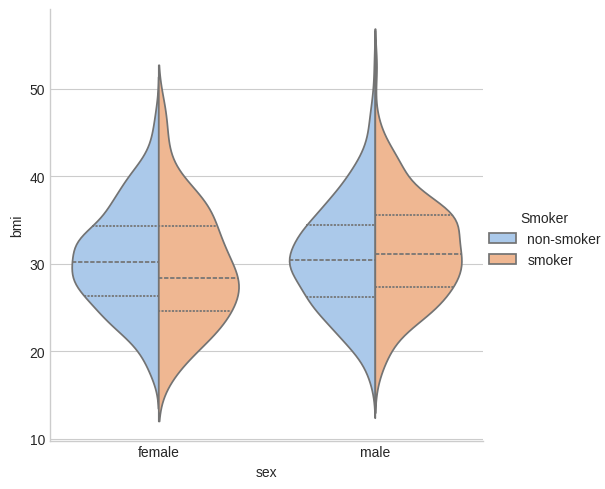

In [84]:
#Visualizing the collected data:
g = sns.catplot(x="sex", y="bmi", hue="smoker",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data, legend_out = True);

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)

new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [85]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_males, bmi_females, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


#### 4.2.5. Step 5: Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [86]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08992430667834876


#### 4.2.6. Step 6: Compare the probability associated with the test statistic with level of significance specified
At 5% significance level, α = 0.05

In [87]:
p_value > 0.05

True

### 4.2.7. Conclusion:
 - We <b>Fail to Reject</b> the Null Hypothesis and state that <b>At 5% significance level, the mean BMI of insured males and females are equal</b>.
 - Hence, BMI of males do not differ significantly from that of females in our data.

## 4.3. Is the proportion of smokers significantly different in different genders?
* 'sex' and 'smoker' are two categorical variables.
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population.

#### 4.3.1. Step 1: State the null and alternative hypothesis
* $H_0$: $p_m$ = $p_f$
* $H_A$: $p_m$ != $p_f$

Where:
 - $p_m$ = Male Smokers / Total Male insured
 - $p_f$ = Female Smokers / Total Female insured

#### 4.3.2. Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a proportion Z - test as our statistical test and the corresponding Z statistic as our test statistic.
#### 4.3.3. Step 3: Choose level of significance α
We select α = 0.05
#### 4.3.4. Step 4: Collect data and calculate the value of test statistic

In [88]:
n_females = data['sex'].value_counts()[0] # number of females in the data
n_males = data['sex'].value_counts()[1] # number of females in the data

female_smokers = data[data['sex'] == 0].smoker.value_counts()[1] # number of female smokers
male_smokers = data[data['sex'] == 1].smoker.value_counts()[1] # number of male smokers

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 17.37%, 23.52% respectively.


[Text(0, 0, 'female'), Text(0, 1, 'male')]

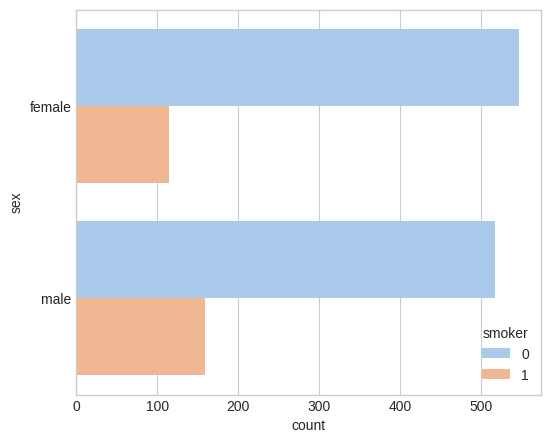

In [89]:
# Visualization of the collected data:
plt.figure(figsize=(6,5))
chart = sns.countplot(y = 'sex', hue = 'smoker', data = data)
chart.set_yticklabels(['female', 'male'])

In [90]:
# The proportions are different, but are they statistically significant?
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: -2.7867402154855503
p_value: 0.005324114164320532


#### 4.3.5. Step 5: Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [91]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {pval} the difference is not significant. We fail to reject the Null Hypothesis')

With a p-value of 0.005324114164320532 the difference is significant. We reject the Null Hypothesis.


#### 4.3.6. Step 6: Conclusion:
 - We <b>Reject</b> the Null Hypothesis and state that <b>At 5% significance level, the porportion of smokers in insured males and females are equal</b>.
 - Hence, proportion of smokers are significantly different in different genders.

## 4.4. Is the distribution of bmi across women with no children, one child and two children, the same?
### Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means.

#### Assumptions of ANOVA

* All populations involved follow a normal distribution
* All populations have the same variance
* The samples are randomly selected and independent of one another

#### 4.4.1. Step 1: State the null and alternative hypothesis
* $H_0$: $\mu_0$ = $\mu_1$ = $\mu_2$
* $H_A$: Atleast one of the means are different.

Where:
 - $\mu_i$ = Population mean of BMI of women having 0, 1 and 2 children.

#### 4.4.2. Step 2: Select an appropriate statistical test and the corresponding test statistic
We select one way ANOVA as our test and mean BMI of the different groups as our test statistic.
#### 4.4.3. Step 3: Choose level of significance α
We select α = 0.05.
#### 4.4.4. Step 4: Collect data and calculate the value of test statistic
Here we have 3 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [92]:
df = data[data['children'] <= 2]
female = df[df['sex'] == 0]
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
9,60,0,25.84,0,0,1,28923.13692
11,62,0,26.29,0,1,2,27808.72510


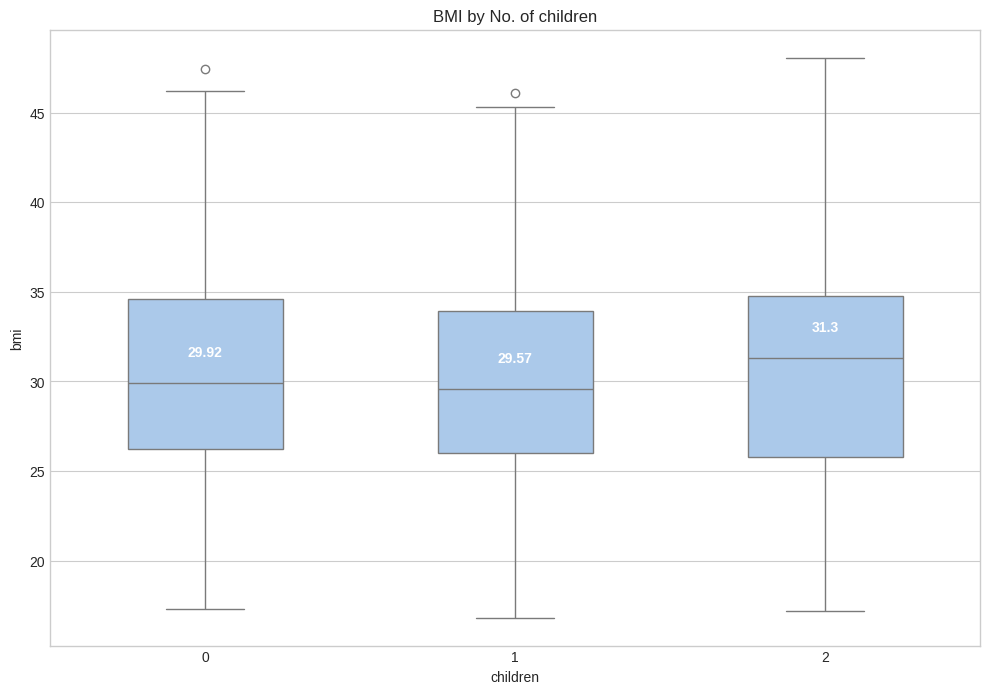

In [93]:
# Visualizing the collected data:
fig = plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = female, width = 0.5)

medians = female.groupby(['children'])['bmi'].median().round(2)
vertical_offset = female['bmi'].median() * 0.05 # offset from median for display

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick],
            horizontalalignment='center',color='w',weight='semibold')


plt.title('BMI by No. of children')
plt.show()

#### Step 5: Calculate p value using ANOVA table
* <code>statsmodels.formula.api.ols</code> creates a model from a formula and dataframe
* <code>statsmodels.api.sm.stats.anova_lm</code> gives an Anova table for one or more fitted linear models.

In [94]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


### Step 6: Conclusion:
 - We <b>Fail to Reject</b> the null hypothesis that for BMI for 3 groups of women having no, one or two children respectively, mean BMI of all groups are equal.
 - Hence, the distribution of BMI across women with no children, one child and two children are the same.

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different.
* We have falied to reject the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [95]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female['bmi'], female['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8641 -1.7185 1.1008  False
     0      2   0.2883 0.9003 -1.2636 1.8401  False
     1      2   0.5971 0.6961 -1.1322 2.3265  False
---------------------------------------------------


## <font color = 'purple'>Remarks:</font>
This is my first Data Science Project, and my first Kernel in Kaggle. I will be extremely grateful for any comments, advice and suggestions. Thank you for reading.